# Task 2: Recommendation Engine - K Nearest Recommendation in similar location


## Setting up the Notebook

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pathlib import Path

## Load the Preprocessed Train Data

In [4]:
df_train = pd.read_csv("../clean_data/train_preproc.csv", index_col=0)
df_train

,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,...,mean_property_sqft,mean_planning_sqft,planning_area_mean,total_rooms,size_per_room,mean_property_type,distance,num_shopping_malls,tenure_99-year leasehold,tenure_freehold
0,hdb,1988,3.0,2.0,1115,116,1.414399,103.837196,yishun south,yishun,...,1079.757868,1231.474343,1.143726e+06,5.0,223.00,6.620452e+05,0.573567,2.0,1,0
1,hdb,1992,4.0,2.0,1575,375,1.372597,103.875625,serangoon north,serangoon,...,1079.757868,2514.468039,3.670975e+06,6.0,262.50,6.620452e+05,1.728895,3.0,1,0
2,condo,2022,4.0,6.0,3070,56,1.298773,103.895798,mountbatten,marine parade,...,1154.798804,2011.903265,4.159877e+06,10.0,307.00,2.919816e+06,1.315256,5.0,0,1
3,condo,2023,3.0,2.0,958,638,1.312364,103.803271,farrer court,bukit timah,...,1154.798804,2468.346271,5.576084e+06,5.0,191.60,2.919816e+06,0.723885,4.0,0,1
4,condo,2026,2.0,1.0,732,351,1.273959,103.843635,anson,downtown core,...,1154.798804,1590.161473,4.853464e+06,3.0,244.00,2.919816e+06,0.370022,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,condo,2026,2.0,2.0,635,605,1.385938,103.834466,tagore,ang mo kio,...,1154.798804,1634.952055,2.355193e+06,4.0,158.75,2.919816e+06,0.150007,4.0,1,0
20092,condo,2026,2.0,2.0,883,137,1.315948,103.857589,lavender,kallang,...,1154.798804,1106.259542,2.256485e+06,4.0,220.75,2.919816e+06,0.442631,6.0,0,1
20093,condo,2023,4.0,4.0,1378,340,1.315961,103.836848,moulmein,novena,...,1154.798804,1662.211716,3.637860e+06,8.0,172.25,2.919816e+06,0.422131,5.0,0,1
20094,hdb,2017,3.0,2.0,1205,402,1.440753,103.806671,woodlands east,woodlands,...,1079.757868,1229.137405,8.223176e+05,5.0,241.00,6.620452e+05,0.632423,8.0,1,0


In [5]:
df_test = pd.read_csv("../clean_data/test_preproc.csv", index_col=0)
df_test

,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,...,mean_property_sqft,mean_planning_sqft,planning_area_mean,total_rooms,size_per_room,mean_property_type,distance,num_shopping_malls,tenure_99-year leasehold,tenure_freehold
0,condo,2022.0,1.0,1.0,463,250.000000,1.344334,103.878690,upper paya lebar,serangoon,...,1154.798804,2514.468039,3.670975e+06,2.0,231.500000,2.919816e+06,0.261673,3.00000,0,1
1,condo,2017.0,3.0,3.0,1033,463.000000,1.380281,103.943878,pasir ris west,pasir ris,...,1154.798804,2533.923372,2.735870e+06,6.0,172.166667,2.919816e+06,1.001264,4.00000,1,0
2,condo,2007.0,1.0,1.0,570,646.000000,1.294668,103.850074,bras basah,museum,...,1154.798804,837.848249,2.212662e+06,2.0,285.000000,2.919816e+06,0.251350,2.00000,1,0
3,hdb,2017.0,3.0,2.0,1216,968.000000,1.373120,103.746094,keat hong,choa chu kang,...,1079.757868,1276.588235,7.643136e+05,5.0,243.200000,6.620452e+05,0.767490,8.00000,1,0
4,hdb,1973.0,3.0,2.0,936,370.844848,1.341468,103.849047,braddell,toa payoh,...,1079.757868,1012.970588,1.506176e+06,5.0,187.200000,6.620452e+05,0.767490,2.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,bungalow,2009.0,5.0,6.0,8000,29.000000,1.249534,103.844281,sentosa,southern islands,...,7619.946019,6499.992933,1.522314e+07,11.0,727.272727,1.702708e+07,2.992831,4.79921,1,0
6962,semi-detached house,2010.0,5.0,7.0,6974,370.844848,1.332492,103.800004,hillcrest,bukit timah,...,5253.011811,2468.346271,5.576084e+06,12.0,581.166667,7.704932e+06,0.389151,4.00000,0,1
6963,condo,2025.0,3.0,2.0,1141,376.000000,1.294106,103.836735,institution hill,river valley,...,1154.798804,1673.884615,5.189564e+06,5.0,228.200000,2.919816e+06,0.729463,4.79921,0,1
6964,hdb,1975.0,3.0,1.0,818,370.844848,1.303736,103.911438,marine parade,marine parade,...,1079.757868,2011.903265,4.159877e+06,4.0,204.500000,6.620452e+05,1.920516,5.00000,1,0


## Computing the Top Recommendations

## Methodology

- We first want to use the location as a filter to
prepare input data for recommendations. We acheived this using KMeans clustering with cluster size = 30 on lat-long 
feature.

- For a particular listing that a user viewed, we looked into which nearest lat-long cluster it belongs to.

- We filtered the house listings from this cluster and applied kNN to estimate the house listing that the user would
like to view on based on features like size per room, number of beds, house size in sqft and number of shopping malls. 

- The neighbour listings of the user house viewing are identified using the Euclidean distance between these features. 

- We then use the k neighbour outcomes from the house listing to show the recommendations to the user.

In [6]:
df_train_simple=df_train[['lat','lng']]

In [19]:
def kmeans_model(data, nclusters):
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    return km


def get_clusters(km, data, nclusters):
    X = data.copy()
    cols = list(X.columns)
    y_km = km.fit_predict(X)
    X['cluster']=y_km
    return X

def cluster_plot(km, data, nclusters):
    X = data.copy()
    cols = list(X.columns)
    y_km = km.fit_predict(X)
    
    # Visualize it:
    plt.figure(figsize=(15, 12))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

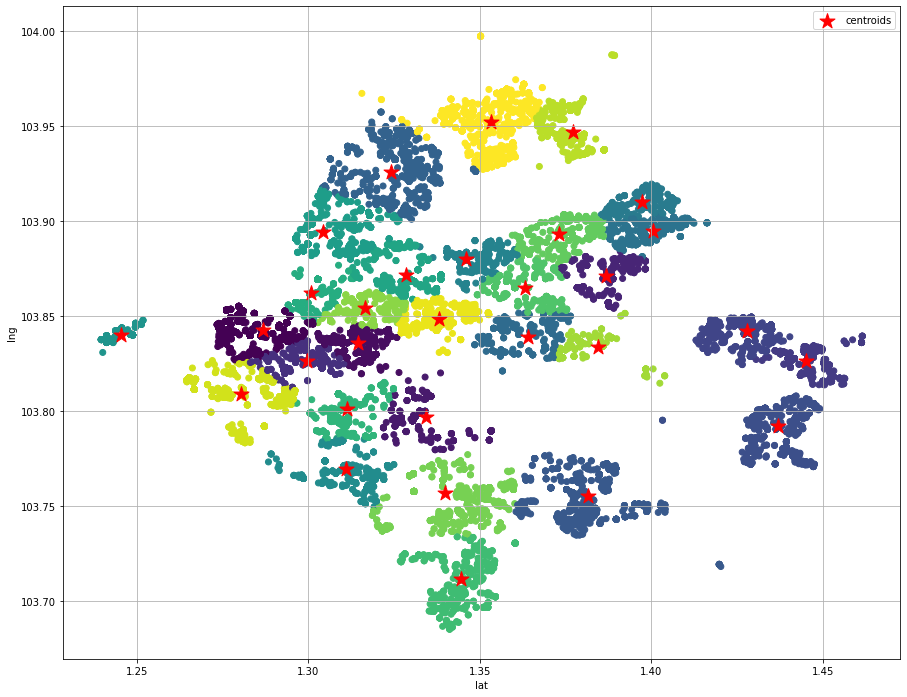

In [8]:
km = kmeans_model(df_train_simple,30)
cluster_plot(km, df_train_simple, 30)

In [20]:
new_clustered_data = get_clusters(km, df_train_simple, 30)
new_clustered_data

,lat,lng,cluster
0,1.414399,103.837196,6
1,1.372597,103.875625,21
2,1.298773,103.895798,16
3,1.312364,103.803271,19
4,1.273959,103.843635,0
...,...,...,...
20091,1.385938,103.834466,25
20092,1.315948,103.857589,24
20093,1.315961,103.836848,1
20094,1.440753,103.806671,7


In [21]:

score = []
for k in range(2,30):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(df_train_simple)
    labels = kmeans.labels_
    ss = silhouette_score(df_train_simple,labels)
    score.append(ss)

Text(0.5, 0, 'no of clusters')

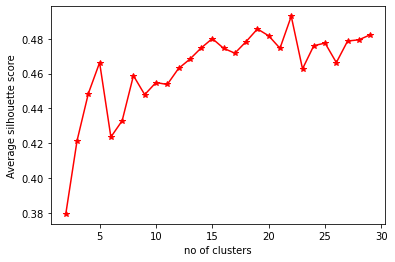

In [22]:
plt.plot(range(2,30), score, marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

## Testing the Recommendation Engine(recommendations made)

- Let's say the user views one of the listing. We shall use his information to suggest recommendations.
- For a particular listing that a user viewed, we looked into which nearest lat-long cluster it belongs to.


In [30]:
# Pick a row id of choice
#row_id = 10
row_id = 20
#row_id = 30
#row_id = 40
#row_id = 50

# Get the row from the dataframe (an valid row ids will throw an error)
row_location = df_test.iloc[row_id][["lat", "lng"]]
row = df_test.iloc[row_id]
test_data = pd.DataFrame([row])
test_data

# Just for printing it nicely, we create a new dataframe from this single row
# pd.DataFrame([row])

,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,...,mean_property_sqft,mean_planning_sqft,planning_area_mean,total_rooms,size_per_room,mean_property_type,distance,num_shopping_malls,tenure_99-year leasehold,tenure_freehold
20,executive condo,2027.0,4.0,4.0,1335,616.0,1.434928,103.845282,yishun east,yishun,...,1157.798811,1231.474343,1.143726e+06,8.0,166.875,1.466825e+06,1.294509,2.0,1,0


In [24]:
y_km = km.predict(pd.DataFrame([row_location]))
y_km

array([6], dtype=int32)

In [25]:
one_clustered_data = df_train[new_clustered_data["cluster"] == y_km[0]]
one_clustered_data

,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,...,mean_property_sqft,mean_planning_sqft,planning_area_mean,total_rooms,size_per_room,mean_property_type,distance,num_shopping_malls,tenure_99-year leasehold,tenure_freehold
0,hdb,1988,3.0,2.0,1115,116,1.414399,103.837196,yishun south,yishun,...,1079.757868,1231.474343,1.143726e+06,5.0,223.000000,6.620452e+05,0.573567,2.0,1,0
35,hdb,2017,3.0,2.0,1001,588,1.424190,103.844932,yishun east,yishun,...,1079.757868,1231.474343,1.143726e+06,5.0,200.200000,6.620452e+05,1.248138,2.0,1,0
68,executive condo,2014,3.0,3.0,1184,406,1.424329,103.848225,yishun east,yishun,...,1157.798811,1231.474343,1.143726e+06,6.0,197.333333,1.466825e+06,1.576111,2.0,1,0
103,executive condo,2017,4.0,3.0,1185,525,1.417017,103.845035,lower seletar,yishun,...,1157.798811,1231.474343,1.143726e+06,7.0,169.285714,1.466825e+06,1.342132,2.0,1,0
113,condo,2019,3.0,2.0,786,660,1.435032,103.844333,yishun east,yishun,...,1154.798804,1231.474343,1.143726e+06,5.0,157.200000,2.919816e+06,1.208111,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20028,executive condo,2027,3.0,2.0,969,616,1.434928,103.845282,yishun east,yishun,...,1157.798811,1231.474343,1.143726e+06,5.0,193.800000,1.466825e+06,1.294509,2.0,1,0
20046,hdb,2016,3.0,2.0,1220,375,1.416505,103.843626,lower seletar,yishun,...,1079.757868,1231.474343,1.143726e+06,5.0,244.000000,6.620452e+05,1.188673,2.0,1,0
20049,hdb,1986,4.0,2.0,1442,132,1.424190,103.844932,yishun east,yishun,...,1079.757868,1231.474343,1.143726e+06,6.0,240.333333,6.620452e+05,1.248138,2.0,1,0
20050,hdb,1987,2.0,2.0,688,137,1.423367,103.832617,yishun west,yishun,...,1079.757868,1231.474343,1.143726e+06,4.0,172.000000,6.620452e+05,0.662923,2.0,1,0


### new_clustered_data contains the filtered data based on lat-long cluster

In [26]:
new_clustered_data[new_clustered_data["cluster"] == y_km[0]]

,lat,lng,cluster
0,1.414399,103.837196,6
35,1.424190,103.844932,6
68,1.424329,103.848225,6
103,1.417017,103.845035,6
113,1.435032,103.844333,6
...,...,...,...
20028,1.434928,103.845282,6
20046,1.416505,103.843626,6
20049,1.424190,103.844932,6
20050,1.423367,103.832617,6


## Main class to train the kNN Model and find recommendations.

In [27]:
from sklearn.neighbors import NearestNeighbors

class Recommender:
    def __init__(self, X, k=10):
        self.X = X


    def feature_selection(self, feature_list):
        return self.X[feature_list]


    def train_model(self, model_input):
        nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(model_input)
        return nbrs
    
    def predict_k(self, nbrs, predict_input_data):
        distances, indices = nbrs.kneighbors(predict_input_data)
        return indices


    def find_house_recommendations(self, recommendations, visited_house_history, num_of_recom = k):
        filtered_houses = recommendations.iloc[visited_house_history]
        return filtered_houses

In [32]:
def get_top_recommendations(row, **kwargs) -> pd.DataFrame:
    k = None
    
    for key, value in kwargs.items():
        if key == 'k':
            k = value
        if key == 'recommendations_input':
           recommendations_input = value
            
    print(len(recommendations_input))


    obj = Recommender(recommendations_input)
    model_input = obj.feature_selection(['size_per_room','num_baths','num_beds','size_sqft'])
    k_model = obj.train_model(model_input)
    predict_input_data = row[['size_per_room','num_baths','num_beds','size_sqft']]
    recommendations_out = obj.predict_k(k_model, predict_input_data)
    # print(recommendations_out)


    recommen_input_data = recommendations_input.copy()
    recommen_input_data1 = recommen_input_data.reset_index()
    out_idx = recommendations_out[0].tolist()
    
    df_result = obj.find_house_recommendations(recommen_input_data1, out_idx, num_of_recom = k)
    print(df_result.shape)

    return df_result


## Compute and Display the recommendations

Since the method `get_top_recommendations()` returns a `pd.DataFrame`, it's easy to display the result.

In [33]:
k = 10

df_recommendations = get_top_recommendations(test_data, k=k, recommendations_input=one_clustered_data)
df_recommendations

745
(10, 27)


,index,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,...,mean_property_sqft,mean_planning_sqft,planning_area_mean,total_rooms,size_per_room,mean_property_type,distance,num_shopping_malls,tenure_99-year leasehold,tenure_freehold
221,5837,executive condo,2027,4.0,4.0,1335,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,8.0,166.875000,1.466825e+06,1.294509,2.0,1,0
553,14672,executive condo,2027,4.0,4.0,1335,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,8.0,166.875000,1.466825e+06,1.294509,2.0,1,0
368,9439,executive condo,2027,4.0,4.0,1335,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,8.0,166.875000,1.466825e+06,1.294509,2.0,1,0
205,5484,executive condo,2027,4.0,4.0,1313,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,8.0,164.125000,1.466825e+06,1.294509,2.0,1,0
186,4829,executive condo,2027,4.0,4.0,1313,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,8.0,164.125000,1.466825e+06,1.294509,2.0,1,0
448,11668,executive condo,2027,4.0,4.0,1313,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,8.0,164.125000,1.466825e+06,1.294509,2.0,1,0
265,6924,executive condo,2027,4.0,4.0,1313,616,1.434218,103.844532,yishun east,...,1157.798811,1231.474343,1.143726e+06,8.0,164.125000,1.466825e+06,1.184451,2.0,1,0
652,17663,executive condo,2027,4.0,3.0,1313,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,7.0,187.571429,1.466825e+06,1.294509,2.0,1,0
121,3022,executive condo,2027,4.0,3.0,1313,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,7.0,187.571429,1.466825e+06,1.294509,2.0,1,0
730,19769,executive condo,2027,4.0,3.0,1313,616,1.434928,103.845282,yishun east,...,1157.798811,1231.474343,1.143726e+06,7.0,187.571429,1.466825e+06,1.294509,2.0,1,0
